# Project 02 - Image Processing

## Student Information

- Full name: Nguyễn Triều Khoáng
- Student ID: 22127204
- Class: 22CLC05

## Required Libraries

In [33]:
# IMPORT YOUR LIBS HERE
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Function Definitions

In [34]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    img = Image.open(img_path)
    img_matrix = np.array(img)

    return img_matrix


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img)
    plt.show()



def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    image = Image.fromarray(img)
    image.save(img_path)


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE

def changeImageBrightness(img, alpha):
    '''
    Change image brightness

    Parameters
    ----------
    img : numpy.ndarray
        2D array representing the image 
    alpha : int
        Alpha value to adjust brightness

    Returns
    -------
    ndarray
        Changed brightness image.
    '''
    adjusted_img = img.astype(np.float64)
    adjusted_img += alpha
    adjusted_img = np.clip(adjusted_img, 0, 255)

    return adjusted_img.astype(np.uint8)

def changeImageConsContrast(img, alpha):
    '''
    Change image contrast

    Parameters
    ----------
    img : numpy.ndarray
        2D array representing the image 
    alpha : int
        Alpha value to adjust contrast

    Returns
    -------
    ndarray
        Changed contrast image.
    '''
    adjusted_img = img.astype(np.float64)
    adjusted_img = (adjusted_img - 128) * alpha + 128
    adjusted_img = np.clip(adjusted_img, 0, 255)

    return adjusted_img.astype(np.uint8)
   


def flipImage(img, direction):
    '''
    Flip image

    Parameters
    ----------
    img : numpy.ndarray
        2D array representing the image 
    direction : str
        Direction of flip

    Returns
    -------
    ndarray
        Fliped image.
    '''

    if direction == 'horizontal':
        adjusted_img = img[:, ::-1]
    elif direction == 'vertical':
        adjusted_img = img[::-1, :]
    return adjusted_img

def rgbToGray(img):
    '''
    Convert image from RGB to Grayscale

    Parameters
    ----------
    img : numpy.ndarray
        2D array representing the image 

    Returns
    -------
    ndarray
        Gray image.
    '''
    adjusted_img = img.astype(np.float64)
    gray = np.dot(adjusted_img[...,:3], [0.2989, 0.5870, 0.1140])
    adjusted_img[...,:3] = gray[:,:,np.newaxis]
    return adjusted_img.astype(np.uint8)

    

def rgbToSepia(img):
    '''
    Convert image from RGB to Sepia

    Parameters
    ----------
    img : numpy.ndarray
        2D array representing the image 

    Returns
    -------
    ndarray
        Sepia-toned image.
    '''

    adjusted_img = img.astype(np.float64)
    sepia_matrix = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    sepia = np.dot(adjusted_img[...,:3], sepia_matrix.T)
    sepia = np.clip(sepia, 0, 255)
    return sepia.astype(np.uint8)

def blurImage(img, kernel_size):
    '''
    Blur image

    Parameters
    ----------
    img : numpy.ndarray
        2D array representing the image
    kernel_size : int
        Kernel size

    Returns
    -------
        numpy.ndarray
        Blurred image
    '''
    height, width, channels = img.shape
    k = kernel_size // 2
    
    img_padded = np.pad(img, ((k, k), (k, k), (0, 0)), 'constant', constant_values=0)
    
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    
    blurred_img = np.zeros_like(img)
    
    for c in range(channels):
        windows = np.lib.stride_tricks.sliding_window_view(img_padded[:, :, c], (kernel_size, kernel_size))
        blurred_values = np.tensordot(windows, kernel, axes=((2, 3), (0, 1)))
        blurred_img[:, :, c] = blurred_values
    
    return blurred_img

    

def sharpenImage(img, kernel_size):
    '''
    Sharpen image

    Parameters
    ----------
    img : numpy.ndarray
        2D array representing the image 
    kernel_size : int
        Kernel size

    Returns
    -------
        numpy.ndarray
        Sharpened image 
    '''
    height, width, channels = img.shape
    k = kernel_size // 2
    
    sharpen_kernel = np.zeros((kernel_size, kernel_size))
    sharpen_kernel[k, k] = 2
    sharpen_kernel -= np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    
    img_padded = np.pad(img, ((k, k), (k, k), (0, 0)), 'constant', constant_values=0)
    
    sharpened_img = np.zeros_like(img)
    
    for c in range(channels):
        windows = np.lib.stride_tricks.as_strided(
            img_padded[:, :, c],
            shape=(height, width, kernel_size, kernel_size),
            strides=img_padded.strides[:2] + img_padded.strides[:2],
            writeable=False,
        )
        
        sharpened_values = np.tensordot(windows, sharpen_kernel, axes=((2, 3), (0, 1)))
        
        sharpened_img[:, :, c] = np.clip(sharpened_values, 0, 255)
    
    return sharpened_img


def cropImage(img, new_width, new_height):
    '''
    Crop image in the middle to a new width and height

    Parameters
    ----------
    img : numpy.ndarray
        2D array representing the image 
    new_width : int
        New width of the cropped image
    new_height : int
        New height of the cropped image

    Returns
    -------
        numpy.ndarray
        Cropped image 
    '''

    height, width = img.shape[:2]

    start_x = width // 2 - new_width // 2
    start_y = height // 2 - new_height // 2

    cropped_img = img[start_y:start_y + new_height, start_x:start_x + new_width]

    return cropped_img

def cropCircularImage(img):
    '''
    Crop image in a circular shape

    Parameters
    ----------
    img : numpy.ndarray
        2D array representing the image 
    Returns
    -------
        numpy.ndarray
        Circular cropped image 
    '''

    height, width = img.shape[:2]
    center_x, center_y = width // 2, height // 2
    if height > width:
        radius = width // 2
    else:
        radius = height // 2

    Y, X = np.ogrid[:height, :width]
    dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)

    circular_mask = dist_from_center <= radius  

    cropped_img = np.zeros_like(img)
    for i in range(3): 
        cropped_img[..., i] = img[..., i] * circular_mask

    return cropped_img

def cropElipseImage(img):
    '''
    Crop image in an eliptical shape

    Parameters
    ----------
    img : numpy.ndarray
        2D array representing the image 

    Returns
    -------
        numpy.ndarray
        Eliptical cropped image 
    '''
    
    height, width = img.shape[:2]
    center_x, center_y = width // 2, height // 2
    diaganol = np.sqrt(height**2 + width**2)
    major_axis = diaganol // 2.3
    minor_axis = height // 2.9

    Y, X = np.ogrid[:height, :width]

    # Calculate the rotated ellipses
    rotated_angle = np.arctan2(height, width)
    rotated_minus_angle = np.arctan2(-height, width)


    X_rotated_angle = (X - center_x) * np.cos(rotated_angle) + (Y - center_y) * np.sin(rotated_angle)
    Y_rotated_angle = (X - center_x) * np.sin(rotated_angle) - (Y - center_y) * np.cos(rotated_angle)
    
    X_rotated_minus_angle = (X - center_x) * np.cos(rotated_minus_angle) + (Y - center_y) * np.sin(rotated_minus_angle)
    Y_rotated_minus_angle = (X - center_x) * np.sin(rotated_minus_angle) - (Y - center_y) * np.cos(rotated_minus_angle)

    ellipse1 = ((X_rotated_angle**2 / major_axis**2 ) + (Y_rotated_angle**2 / minor_axis **2)) <= 1
    ellipse2 = ((X_rotated_minus_angle**2 / major_axis **2) + (Y_rotated_minus_angle**2 / minor_axis **2)) <= 1

    combined_mask = ellipse1 | ellipse2
    
    cropped_img = np.zeros_like(img)
    for i in range(3):  # Assuming img is in RGB
        cropped_img[..., i] = img[..., i] * combined_mask

    return cropped_img
    
    

def zoomImage(img, scale):
    '''
    Zoom in image

    Parameters
    ----------
    img : numpy.ndarray
        2D array representing the image 
    scale : int
        Scale factor

    Returns
    -------
        numpy.ndarray
        Zoomed in image 
    '''

    scale_factor = scale
    
    zoomed_height = int(img.shape[0] * scale_factor)
    zoomed_width = int(img.shape[1] * scale_factor)
    
    zoomed_image = np.zeros((zoomed_height, zoomed_width, img.shape[2]), dtype=img.dtype)
    
    for i in range(zoomed_height):
        for j in range(zoomed_width):
            orig_i, orig_j = int(i / scale_factor), int(j / scale_factor)
            zoomed_image[i, j] = img[orig_i, orig_j]
    
    return zoomed_image



<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

## Main FUNCTION

In [35]:
# YOUR CODE HERE
def main():
    img_path = input("Input image path: ")
    img_name, ext = img_path.split('.')
    img = read_img(img_path)
    print("1. Change Image Brightness")
    print("2. Change Image Contrast")
    print("3. Flip Image Horizontal")
    print("4. Flip Image Vertical")
    print("5. Convert Image to Gray")
    print("6. Convert Image to Sepia")
    print("7. Blur Image")
    print("8. Sharpen Image")
    print("9. Crop Image")
    print("10. Crop Circular Image")
    print("11. Crop Elipse Image")
    print("12. Zoom In Image")
    print("13. Zoom Out Image")
    print("0. Exit")
    while True:
        i = int(input("Choose the number of the operation you want to do: "))
        if i == 0:
            break
        if i == 1:
            adjusted_img = changeImageBrightness(img, 50)
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_brightness.{ext}')
        elif i == 2:
            adjusted_img = changeImageConsContrast(img, 1.5)
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_contrast.{ext}')
        elif i == 3:
            adjusted_img = flipImage(img, 'horizontal')
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_flip_horizontal.{ext}')
        elif i == 4:
            adjusted_img = flipImage(img, 'vertical')
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_flip_vertical.{ext}')
        elif i == 5:
            adjusted_img = rgbToGray(img)
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_gray.{ext}')
        elif i == 6:
            adjusted_img = rgbToSepia(img)
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_sepia.{ext}')
        elif i == 7:
            adjusted_img = blurImage(img, 5)
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_blur.{ext}')
        elif i == 8:
            adjusted_img = sharpenImage(img, 5)
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_sharpen.{ext}')
        elif i == 9:
            adjusted_img = cropImage(img, 300, 300)
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_crop.{ext}')
        elif i == 10:
            adjusted_img = cropCircularImage(img)
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_crop_circular.{ext}')
        elif i == 11:
            adjusted_img = cropElipseImage(img)
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_crop_elipse.{ext}')
        elif i == 12:
            adjusted_img = zoomImage(img, 2)
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_zoom.{ext}')
        elif i == 13:
            adjusted_img = zoomImage(img, 0.5)
            show_img(adjusted_img)
            save_img(adjusted_img, f'{img_name}_zoom_out.{ext}')
        

1. Change Image Brightness
2. Change Image Contrast
3. Flip Image Horizontal
4. Flip Image Vertical
5. Convert Image to Gray
6. Convert Image to Sepia
7. Blur Image
8. Sharpen Image
9. Crop Image
10. Crop Circular Image
11. Crop Elipse Image
12. Zoom In Image
13. Zoom Out Image
0. Exit


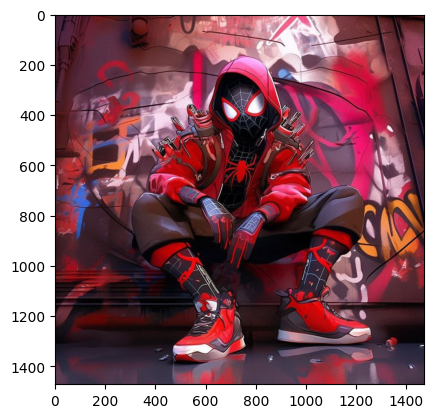

ValueError: invalid literal for int() with base 10: ''

In [36]:
# Call main function
main()